# Matrix Pencil Method (MPM) | Study

## Using the matrix pencil method to estimate the parameters of a sum of complex exponentials, Tapan K. Sarkar and Odilon Pereira

O Matrix Pencil Method (MPM) é um método linear para aproximar funções como soma de exponenciais complexas. É um método mais robusto quando se trata de lidar com daddos ruidosos. Esse método tem uma menor variância dos parâmetros estimados se comparados com os método polinomiais, como o meotodo de Prony. A modelagem utilizada para os sinais é do formato:
$$y(t) = x(t) + n(t) \approx \sum_{i = 1}^{M}R_i e^{s_it} + n(t), \ \ 0 \leq t \leq T$$

A qual $y(t)$ é a resposta do sinal no tempo, $n(t)$ é o ruído no sistema, $x(t)$ é o sinal, $R_i$ são os resíduos ou amplitudes complexas, $s_i = \alpha_i + j\omega_i$, $\alpha_i$ são os fatores de amortecimento, e $w_i$ são as frequências angulares ($\omega _i = 2\pi f_i$). 

Após o sampleamento, a variável no tempo $t$ se torna $kT_s$, a qual $T_s$ é o período de sampleamento.
$$y(kT_s) = x(kT_s) + n(kT_s) \approx \sum_{i = 1}^{M}R_i z_i^{k} + n(kT_s), \ \ k = 0,...,N-1$$

Com $z_i = e^{s_iT_s}$

O objetivo é encontrar a melhor estimativa para $M$, ou seja, quantas exponenciais serão usadas para a modelagem, $R_i$ e $z_i$ para cada $M$, ou seja, os resíduos e os polos. De maneira geral, a estimativa simultânea de cada um desses parâmteros constitui um problema não-linear, porém, em muitas das vezes, resolver o problema linear acaba sendonão só interessante, como equivalente. Além disso, essa solução pode ser usada como chute inicial para a resolução nã-linear.

O MPM é mais eficiente que a abordagem polinomial por requerer um passo apenas. Além disso, o método polinomial requer a solução de polinômios, algo que é computacionalmente ineficiente para um número de raízes muito grandes. O método de prony é muito sensível a ruído.

O termo "pencil" vem de combinar duas funções da seguinte maneira:
$$f(t, \lambda) = g(t) + \lambda h(t)$$
Sendo que $f(t, \lambda)$ é o "pencil" de $g(t)$ e $h(t)$. $g(t)$ também não pode ser um múltiplo escalar de $h(t)$.


### Caso sem ruído

Primeiro, tratando do caso sem ruído: Definimos duas matrizes $(N-L) \times L$, $Y_1$ e $Y_2$:

$$Y_2 = \begin{bmatrix} x(1) & x(2) & \dots & x(L) \\
                        x(2) & x(3) & \dots & x(L + 1) \\
                        \vdots & \vdots & & \vdots \\
                        x(N-L) & x(N - L + 1) & \dots & x(N-1) \\
\end{bmatrix}$$

$$Y_1 = \begin{bmatrix} x(0) & x(1) & \dots & x(L-1) \\
                        x(1) & x(2) & \dots & x(L) \\
                        \vdots & \vdots & & \vdots \\
                        x(N - L - 1) & x(N - L) & \dots & x(N-2) \\
\end{bmatrix}$$

**COMENTÁRIO: aparentemente essas matrizes são matriz que percorrem o sinal em fatias, de tamanho fixo L, a qual cada linha será uma fatia do sinal.**

Sendo $L$ o parâmetro de pencil, que por sinal é eficiente em eliminar alguns dos efeitos do ruído nos dados.

É possível escrevê-las como:

$Y_2 = Z_1 R Z_0 Z_2$

e

$Y_1 = Z_1 R Z_2$

Sendo:

$$Z_1 = \begin{bmatrix} 1 & 1 & \dots & 1 \\
                        z_1 & z_2 & \dots & z_M \\
                        \vdots & \vdots & & \vdots \\
                        z_1^{N - L - 1} & z_2^{N - L - 1} & \dots & z_M^{N - L - 1} 
\end{bmatrix}$$

$$Z_2 = \begin{bmatrix} 1 & z_1 & \dots & z_1^{L-1} \\
                        1 & z_2 & \dots & z_2^{L-1} \\
                        \vdots & \vdots & & \vdots \\
                        1 & z_M & \dots & z_M^{L-1} \\
\end{bmatrix}$$

$$Z_0 = diag(z_1, z_2, \dots, z_M)$$

E, por fim:

$$R = diag(R_1, R_2, \dots, R_M)$$

Considerando agora o pencil: **COMENTÁRIO: esse pencil parece uma derivada, com o diferencial do parâmtero $\lambda$**

$$Y_2 - \lambda Y_1 = Z_1 R Z_0 Z_2 - \lambda Z_1 R Z_2$$

$$Y_2 - \lambda Y_1 = Z_1 R (Z_0 Z_2 - \lambda Z_2)$$

$$Y_2 - \lambda Y_1 = Z_1 R (Z_0 - \lambda I) Z_2$$

Considerando $\lambda = z_i$, a matriz $Z_0 - \lambda I$ é zero, tornando: **DÚVIDA: não entendi o por que de $\lambda$ ser assumido como $z_i$.**

$$Y_2 - \lambda Y_1 = Z_1 R 0 Z_2 = 0$$

Ou seja, encontrando os *autovalores generalizados* do par $\{Y_1, Y_2\}$, encontramos os polos $z_i$. É possível também encontrar $z_i$ como resultado do problema de autovalores comuns de:

$$Y_1^+ Y_2 - \lambda I = 0$$

Com $Y_1^+$ sendo a matriz pseudoinversa de Moore-Penrose, definida como:

$$Y_1^+= (Y_1^H Y_1)^{-1}Y_1^H$$

No qual $H$ denota o conjugado transposto. 

### Caso com ruído

No caso com ruído, é construída a matriz generalizada:

$$Y = \begin{bmatrix} y(0) &y(1) & y(2) & \dots & y(L) \\
                      y(1) & y(2) & y(3) & \dots & y(L + 1) \\
                      \vdots & \vdots & \vdots & & \vdots \\
                      y(N - L -1) & y(N-L) & y(N - L + 1) & \dots & y(N-1) \\
\end{bmatrix}$$

Da qual é possível extrair $Y_1$ e $Y_2$ deletando a última e a primeira coluna, respectivamente. 


Para filtragem do ruído, $L$ é escolhido entre $N/3$ e $N/2$, intervalo no qual a variância dos parâmtreos $z_i$ por conta do ruído pareceu mínima.


Após a construção, aplica-se uma decomposição em Valores Signulares (SVD) nessa matriz:

$$Y = U \Sigma V^H$$

A qual a matriz $U$, a matriz de vetores singulares à esquerda, contém os autovetores da matriz $YY^H$. $V$, chamada de matriz de vetores singulares à direita, contém os autovetores da matriz $Y^HY$, e $\Sigma$, a matriz diagonal de valores singulares, contém os autovalores tanto de $YY^H$ e $Y^HY$.

Com as submatrizes encontradas, o número M de polos a serem encontrados é escolhido, escolhendo os M autovalores de $\Sigma$ que mais contribuem para a matriz final. A sugestão de exclusão segue:

$$\frac{\sigma_c}{\sigma _{max}} = 10^{-p}$$

Sendo $\sigma_c$ o autovalor analisado, $\sigma _{max}$ o maior autovalor e $p$ o número de algarismos significativos. A partir disso, é possível filtrar os autovalores, separando os mais significativos de ruído. **COMENTÁRIO: é na etapa de seleção do L e nessa que ocorre a filtragem do ruído.**


Encontrado o autovalor limite de filtragem, a matriz $Y$ é reconstruída com menos algarismos, e a partir dela, $Y_1$ e $Y_2$ são derivadas. Realizada essa etapa, deve-se então calcular os autovalores generalizados do par ${Y_2, Y_1}$, ou o autovalor da matriz $Y_1^+Y_2$.

Encontrados os autovalores, basta encontrar os resíduos a partir do seguinte problema de mínimos quadrados:

$$\begin{bmatrix} y(0) \\
y(1) \\
\vdots \\
y(N-1)
\end{bmatrix} = 
\begin{bmatrix} 1 & 1 & \dots & 1 \\
z_1 & z_2 & \dots & z_M \\
\vdots & \vdots & \dots & \vdots \\
z_1^{N-1} & z_2^{N-1} & \dots & z_M^{N-1}
\end{bmatrix} \cdot 
\begin{bmatrix}
R_1 \\
R_2 \\
\vdots \\
R_{M}
\end{bmatrix}$$

Basta então reconstruir o sinal com:

$$y(kT_s) \approx \sum_{i = 1}^{M}R_i z_i^{k}, \ \ k = 0,...,N-1$$

## Implementação

### setup

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pyMRI.pymri as pymri
from numpy.fft import fft, fftfreq, fftshift
from pyMRI.utils import RMSE

In [3]:
metabolites = pymri.METABOLITES

In [4]:
t0 = 0.0
tn = 1.0
n_points = 2048
Dt = tn - t0
dt = Dt/n_points 
sampling_f = 1.0/dt # cycles/s
B0 = 3.0

In [5]:
met_slice = 15 #limit is 14

In [6]:
deltas = np.array(list(metabolites.values()))[:met_slice, 0]
t2s = np.array(list(metabolites.values()))[:met_slice, 1]
M_0s = np.array(list(metabolites.values()))[:met_slice, 2]
spins_phi = np.zeros_like(deltas)
ws = pymri.hz_to_rad(pymri.f_from_chem_shift(deltas, B0) )

print( pymri.rad_to_hz(ws) )
print( "All frequencies are captured by the sampling rate." if pymri.check_frequency(ws, dt) == True 
      else f"At least one frequency is NOT captured by the sampling rate")

[374.84360487 383.83596833 397.33728675 397.97594892 418.92406833
 428.50400098 515.52810921 539.03087732 543.75697743 584.00546781
 593.45766803 611.35298223 632.42883407 654.4115862 ]
All frequencies are captured by the sampling rate.


In [7]:
pop = pymri.population(ws, t2s, M_0s, spins_phi)

sig, t = pymri.population_transverse_decay(t0, tn, dt, pop, np.array([]))
sig_fft = fftshift(fft(sig, sig.size))
freqs = pymri.chem_shift_from_f(fftshift(fftfreq(sig.size, d = dt)), B0)
plot_freqs = freqs[freqs.size//2:]
plot_sig_fft = sig_fft[freqs.size//2:]

center = plot_freqs.size//2
b = plot_freqs.size//2
b = int(35*100*dt*b)

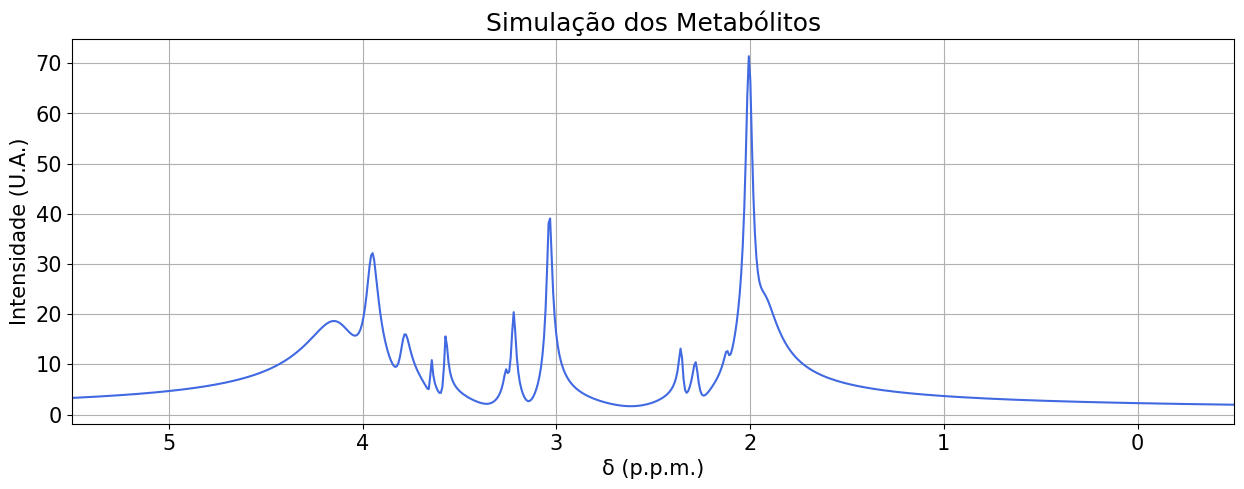

In [8]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(15, 5))

plt.plot(plot_freqs[:b], np.absolute(plot_sig_fft[:b]), c = "royalblue")
plt.xlim(-0.5, 5.5)
plt.title("Simulação dos Metabólitos")
plt.xlabel("δ (p.p.m.)")
plt.ylabel("Intensidade (U.A.)")
plt.gca().invert_xaxis() #inverts the x axis
plt.grid()

### MPM sem ruído

Primeiro, implementa-se o MPM em um exemplo mais simples, de um sinal com poucas frequências, como definido acima. Define-se o $L$, que é o tamanho da fatia do sinal que será percorrido na matriz $Y$, calculando-o de maneira relativa ao $N$.

In [9]:
N = sig.shape[0]
L = int(N/2.5)
print(L)

print(sig.dtype)

rcond = 1e-7 # variável MUITO importante para fazer os cálculos numéricos darem certo

819
complex128


In [10]:
Y = np.zeros((N - L, L + 1), dtype=np.complex128)
print(Y.shape)

(1229, 820)


Produz-se a matriz $Y$:

In [11]:
for i in range(N - L):
    Y[i] = sig[i:i + L + 1]

E logo em seguida calcula-se $Y_1$ e $Y_2$, fatiando $Y$ no seu começo e fim.

In [12]:
Y1 = Y[:,:L]
Y2 = Y[:,1:]
print(Y1.shape, Y2.shape)

(1229, 819) (1229, 819)


In [13]:
from numpy.linalg import pinv, lstsq, eigvals

    É importante comentar aqui que ocorreu um problema nessa etapa. Ao tentar calcular os autovalores generalizados do par ${Y_2, Y_1}$, a função `eigh` obteve erro, acusando que  $Y_1$ não era *positiva-definida*. Uma matriz é positivo-definida quando é simétrica e todos os seus autovalores são positivos. A função `eigh` usa da [Decomposição de Cholesky]    (https://en.wikipedia.org/wiki/Cholesky_decomposition) para calcular os autovalores, e a mesma requer que suas matrizes tenham essa propriedade para funcionar. 
    
    Dado esse problema, optou-se por calcular os autovalores da matriz $Y_1^+Y_2$, a qual $Y_1^+$ é a pseudoinversa de Moore-Penrose, como definido acima.



Optou-se, na verdade, pelo cálculo dos autovalores de $Y_1^+Y_2$ pois essa matriz é quadrada, permitindo o cálculo de seus autovalores. A função `scipy.linalg.eig` não calcula autovalores de matrizes não-quadradas.

Calcula-se a pseudo-inversa de Moore-Penrose:

In [14]:
Y1_p = pinv(Y1, rcond = rcond) 

# Importante especificar o rcond para que a filtragem de valores singulares 
# não corte valores significativos para os cálculos e prejudique o resultado final

Produz-se a matriz a qual será calculada seus autovalores:

In [15]:
M = np.matmul(np.matrix(Y1_p), np.matrix(Y2))

In [16]:
print(M.shape)

(819, 819)


Calcula-se, enfim, os autovalores:

In [17]:
w = eigvals(M)

In [18]:
print(w)
print(w.shape)

[-4.00305395e-01+8.57157216e-01j -3.56740780e-01+9.21204411e-01j
 -2.96923533e-01+9.43765931e-01j -2.46772907e-01+9.66808050e-01j
 -2.18391478e-01+9.72465107e-01j -9.68250941e-02+9.90653156e-01j
 -8.24793897e-02+9.92289017e-01j -1.07669678e-02+9.94682590e-01j
  2.52308627e-01+9.63316452e-01j  2.80042119e-01+9.53898016e-01j
  3.98581309e-01+8.90642518e-01j  3.80611393e-01+9.17570858e-01j
  3.40893954e-01+9.34401174e-01j  3.19998252e-01+8.71816075e-01j
  2.55779112e-15+3.86209572e-15j  4.11974727e-15+1.79278070e-15j
 -4.60343791e-15+1.17486106e-15j -2.31499425e-16-4.47236649e-15j
  4.09351997e-15-8.58315553e-16j  3.22723803e-15-2.74704103e-15j
  3.03008602e-15+2.88793650e-15j -4.03481770e-15+1.80521070e-15j
 -4.10145830e-15-6.20342726e-16j -3.23476271e-15-2.41815659e-15j
 -1.09193719e-15-3.58790026e-15j -6.64776906e-17-3.72621322e-15j
 -1.06799816e-15+3.61831881e-15j  1.67660942e-15+3.15525286e-15j
  3.04543048e-15-1.54589677e-15j  2.12341533e-15-2.64775271e-15j
  2.98475960e-15+1.193830

Agora, deve-se calcular os resíduos:

In [19]:
Zs = np.zeros((N, w.shape[0]), dtype=np.complex128)

for i in range(N):
    Zs[i] = np.power(w, i)

In [20]:
# print(Zs[1])

In [21]:
print(np.matrix(Zs).shape, np.matrix(sig).T.shape)

(2048, 819) (2048, 1)


In [22]:
R = lstsq(Zs, sig, rcond=rcond)[0]

In [23]:
print(R)
print(np.any(R > 0.0000001))

[ 8.24400000e-01+3.98660722e-14j  2.99100000e-01-8.35442826e-15j
  1.05400000e-01-1.35447209e-14j  1.50000000e-02-1.87350135e-15j
  4.11000000e-02-3.42781359e-15j  2.02000000e-02-1.28369537e-14j
  7.76000000e-02-1.55431223e-15j  2.02600000e-01-5.46784840e-15j
  4.27000000e-02+5.41233725e-15j  4.51000000e-02+4.80171458e-15j
  2.91700000e-01-2.35922393e-15j  4.28900000e-01+3.03090886e-14j
  1.84000000e-02+6.93129094e-15j  2.90000000e-02-1.66811009e-14j
  3.19189120e-16+5.68989300e-16j  3.94623119e-17+3.81293520e-16j
  1.21430643e-17-5.72025066e-16j -6.21031004e-16-7.63278329e-17j
 -2.15105711e-16+3.80771803e-16j -4.17200996e-16+3.16587034e-16j
  1.70870262e-16+2.77122075e-16j -1.12757026e-17-5.29958022e-16j
 -1.98625838e-16-5.16513915e-16j -3.85975973e-16-4.44522891e-16j
 -4.96130914e-16-1.84314369e-16j -5.55111512e-16-1.01047642e-16j
  2.52402266e-16-1.66099773e-16j  1.98625838e-16+1.33573708e-16j
 -2.62810607e-16+2.71917905e-16j -4.14598911e-16+1.52655666e-16j
 -9.54097912e-18+2.662800

In [24]:
reconstructed_sig = np.zeros(N, dtype=np.complex128)

In [25]:
for i in range(L):
    reconstructed_sig += R[i]*Zs[:,i]

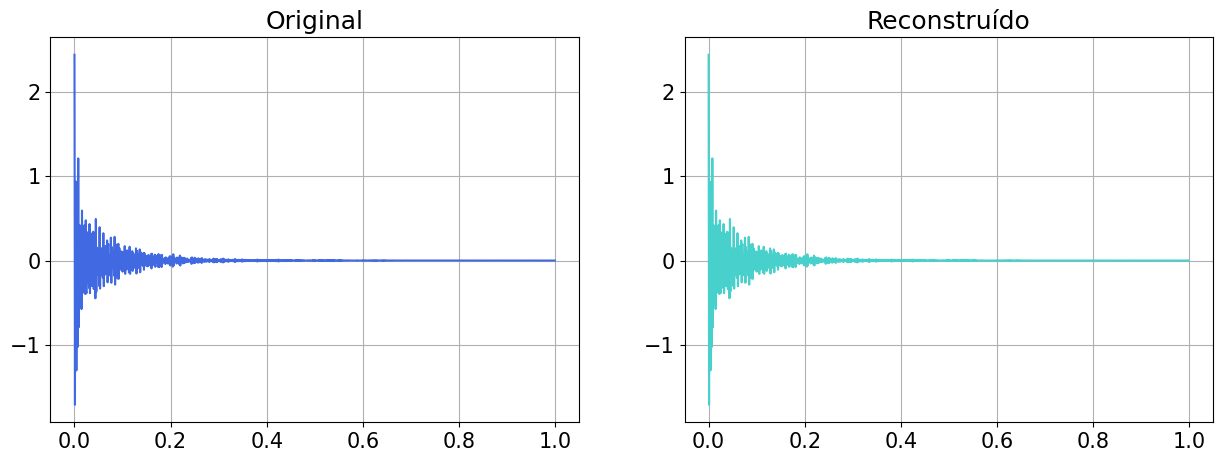

In [26]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(t, sig.real, c = "royalblue")
plt.title("Original")
plt.grid()

plt.subplot(122)
plt.plot(t, reconstructed_sig.real, c = "mediumturquoise")
plt.title("Reconstruído")
plt.grid()

In [27]:
error = RMSE(sig, reconstructed_sig)

print(error)

(8.571012542000137e-16+4.609598759386432e-16j)


In [28]:
r_sig_fft = fftshift(fft(reconstructed_sig, reconstructed_sig.size))
r_freqs = pymri.chem_shift_from_f(fftshift(fftfreq(reconstructed_sig.size, d = dt)), B0)
r_plot_freqs = r_freqs[freqs.size//2:]
r_plot_sig_fft = r_sig_fft[freqs.size//2:]

center = r_plot_freqs.size//2
b = r_plot_freqs.size//2
b = int(35*100*dt*b)

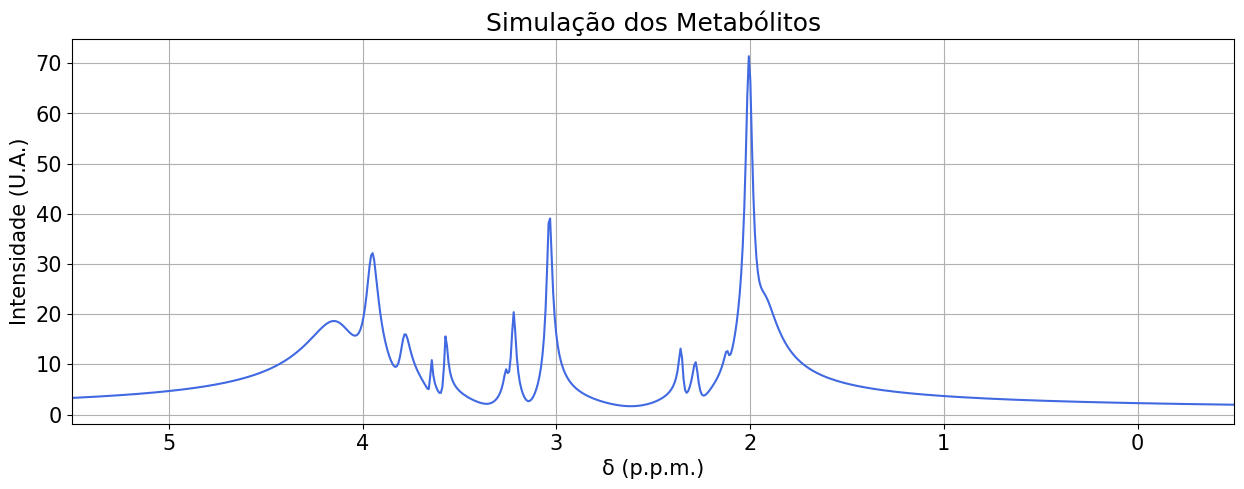

In [29]:
plt.figure(figsize=(15, 5))
plt.plot(r_plot_freqs[:b], np.absolute(r_plot_sig_fft[:b]), c = "royalblue")
plt.xlim(-0.5, 5.5)
plt.title("Simulação dos Metabólitos")
plt.xlabel("δ (p.p.m.)")
plt.ylabel("Intensidade (U.A.)")
plt.gca().invert_xaxis() #inverts the x axis
plt.grid()

### MPM com ruído

In [30]:
def y2y1_matrices(  sig : np.ndarray, 
                    L : float, 
                    return_y : bool = False):
    """Generates the Y matrix for the MPM calculations.
    
    Parameters
    ----------
    sig : np.ndarray (N, 1)
        The signal from which the matrix will be generated.
    L : float [0.0, 1.0]
        The percentage of the size of the signal where the signal will be sliced.\n
        Signal slice will be of size `int(L*N)`, where `N` is the total size of the signal.
    return_y : bool = False
        Whether to output only the major Y matrix"""
    N = sig.shape[0]
    L_ = int(L*N)
    Y = np.zeros((N - L_, L_ + 1), dtype=np.complex128)
    for i in range(N - L_):
        Y[i] = sig[i:i + L_ + 1]
    if return_y == False:
        return Y[:,1:], Y[:,:L_] #Y2, Y1
    else:
        return Y

In [31]:
from numpy.linalg import svd

Introduzindo um sinal com ruído:

In [32]:
c_sig = pymri.corrupted_snr(sig, 0.0, 0.01)

In [33]:
c_sig_fft = fftshift(fft(c_sig, c_sig.size))
c_freqs = pymri.chem_shift_from_f(fftshift(fftfreq(c_sig.size, d = dt)), B0)
c_plot_freqs = c_freqs[freqs.size//2:]
c_plot_sig_fft = c_sig_fft[freqs.size//2:]

center = c_plot_freqs.size//2
b = c_plot_freqs.size//2
b = int(35*100*dt*b)

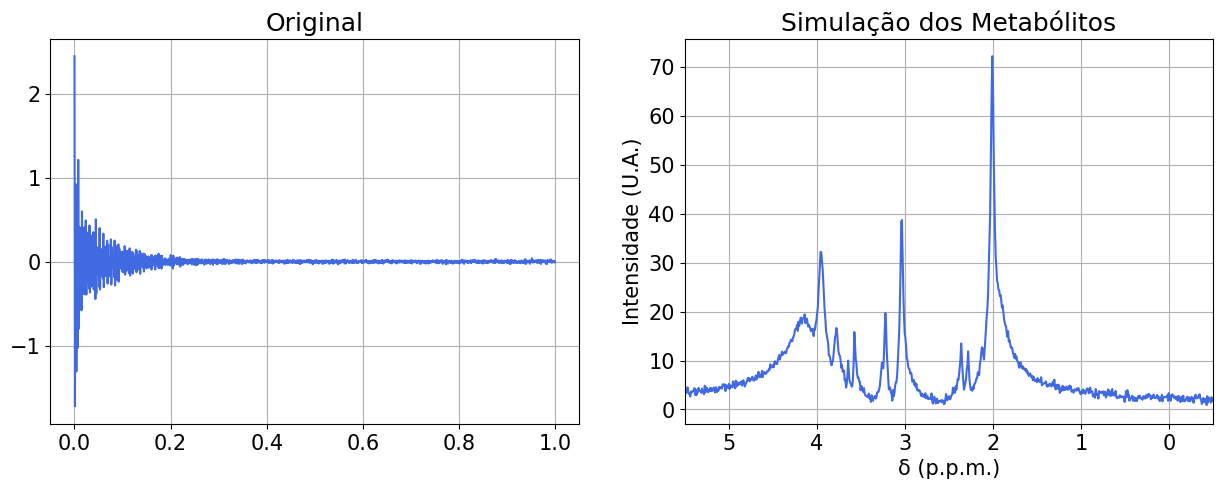

In [34]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(t, c_sig.real, c = "royalblue")
plt.title("Original")
plt.grid()

plt.subplot(122)
plt.plot(c_plot_freqs[:b], np.absolute(c_plot_sig_fft[:b]), c = "royalblue")
plt.xlim(-0.5, 5.5)
plt.title("Simulação dos Metabólitos")
plt.xlabel("δ (p.p.m.)")
plt.ylabel("Intensidade (U.A.)")
plt.gca().invert_xaxis() #inverts the x axis
plt.grid()

In [35]:
L = 0.35
L_ = int(L*c_sig.size)
Y = y2y1_matrices(c_sig, L, return_y=True)

In [36]:
U, Sigma, Vt = svd(Y, full_matrices=False)

In [37]:
noise_threshold = 1e-1

max_sval = Sigma[0]
M = Sigma[Sigma/max_sval > noise_threshold].size

In [38]:
Y_ = np.matmul( np.matmul(U, np.diag(Sigma)[:, :M]), Vt[:M, :] ) # filtered Y
print(Y.shape, Y_.shape)
Y2, Y1 = Y_[:,1:], Y_[:,:L_] #Y2, Y1
# print(Y2.shape, Y1.shape)

(1332, 717) (1332, 717)


In [39]:
Y1_p = pinv(Y1, rcond=rcond)
A = np.matmul(Y1_p, Y2)
w = eigvals(A)
Zs = np.zeros((N, w.shape[0]), dtype=np.complex128)
for i in range(N):
    Zs[i] = np.power(w, i)
R = lstsq(Zs, c_sig, rcond=rcond)[0]
reconstructed_sig = np.zeros(N, dtype=np.complex128)
for i in range(L_):
    reconstructed_sig += R[i]*Zs[:,i]

In [40]:
r_c_sig_fft = fftshift(fft(reconstructed_sig, reconstructed_sig.size))
r_c_freqs = pymri.chem_shift_from_f(fftshift(fftfreq(reconstructed_sig.size, d = dt)), B0)
r_c_plot_freqs = r_c_freqs[freqs.size//2:]
r_c_plot_sig_fft = r_c_sig_fft[freqs.size//2:]

center = r_c_plot_freqs.size//2
b = r_c_plot_freqs.size//2
b = int(35*100*dt*b)

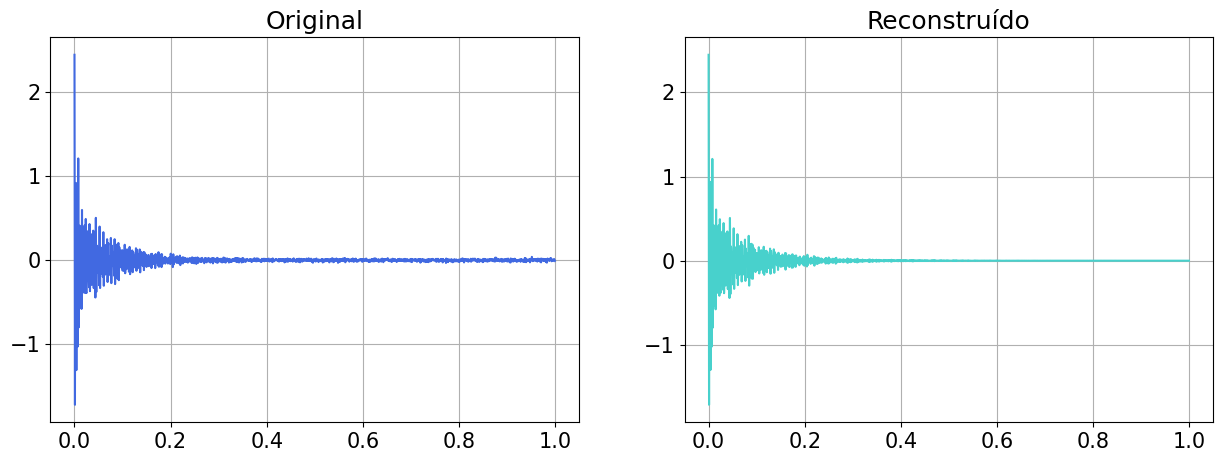

In [41]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(t, c_sig.real, c = "royalblue")
plt.title("Original")
plt.grid()

plt.subplot(122)
plt.plot(t, reconstructed_sig.real, c = "mediumturquoise")
plt.title("Reconstruído")
plt.grid()

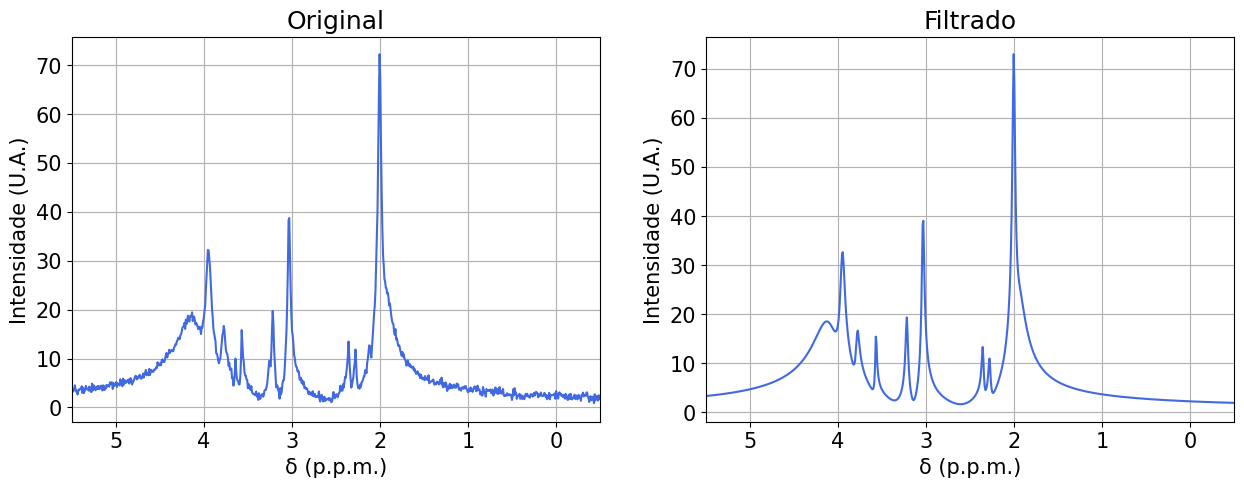

In [42]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(c_plot_freqs[:b], np.absolute(c_plot_sig_fft[:b]), c = "royalblue")
plt.xlim(-0.5, 5.5)
plt.title("Original")
plt.xlabel("δ (p.p.m.)")
plt.ylabel("Intensidade (U.A.)")
plt.gca().invert_xaxis() #inverts the x axis
plt.grid()

plt.subplot(122)
plt.subplot(122)
plt.plot(r_c_plot_freqs[:b], np.absolute(r_c_plot_sig_fft[:b]), c = "royalblue")
plt.xlim(-0.5, 5.5)
plt.title("Filtrado")
plt.xlabel("δ (p.p.m.)")
plt.ylabel("Intensidade (U.A.)")
plt.gca().invert_xaxis() #inverts the x axis
plt.grid()

### Modulação

In [43]:
def filter_sig(sig : np.ndarray, 
               L : float, 
               noise_threshold : float, 
               rcond : float = 1e-7):
    """Filters a signal using the MPM algorithm.
    
    Parameters
    ----------
    sig : np.ndarray
        Signal to be filtered.
    L : float `[0.0, 1.0]`
        The percentage of the size of the signal where the signal will be sliced.\n
        Signal slice will be of size `int(L*N)`, where `N` is the total size of the signal.
    noise_threshold : float
        Threshold for filtering the singular values. 
        `singular_value/max_singular_value <= noise_threshold` will be filtered out.
    rcond : float = `1e-7`
        Threshold for filtering singular values in the Moore-Penrose and least-squares steps. 
        Default is set to `1e-7`."""
    # Matrix Y generation step
    N = sig.size
    L_ = int(L*N)
    Y = y2y1_matrices(sig, L, return_y=True)

    # SVD noise filtering step
    U, Sigma, Vt = svd(Y, full_matrices=False)
    max_sval = Sigma[0]
    M = Sigma[Sigma/max_sval > noise_threshold].size
    
    Y_ = np.matmul( np.matmul(U, np.diag(Sigma)[:, :M]), Vt[:M, :] ) # filtered Y

    Y2, Y1 = Y_[:,1:], Y_[:,:L_] #Y2, Y1

    # Matrix Y1^+Y2 construction step
    Y1_p = pinv(Y1, rcond=rcond)
    A = np.matmul(Y1_p, Y2)

    # Eigenvalues calculation step
    w = eigvals(A)

    # Residues calculation step
    Zs = np.zeros((N, w.shape[0]), dtype=np.complex128)
    for i in range(N):
        Zs[i] = np.power(w, i)

    R = lstsq(Zs, sig, rcond=rcond)[0]

    # Reconstruction of the filtered signal step
    reconstructed_sig = np.zeros(N, dtype=np.complex128)
    for i in range(L_):
        reconstructed_sig += R[i]*Zs[:,i]
    
    return reconstructed_sig

In [44]:
c_sig = pymri.corrupted_snr(sig, 0.0, 0.02)

In [45]:
reconstructed_sig = filter_sig(c_sig, 0.3, 5e-2, rcond=rcond)

In [46]:
c_sig_fft = fftshift(fft(c_sig, c_sig.size))
c_freqs = pymri.chem_shift_from_f(fftshift(fftfreq(c_sig.size, d = dt)), B0)
c_plot_freqs = c_freqs[c_freqs.size//2:]
c_plot_sig_fft = c_sig_fft[c_freqs.size//2:]

center = c_plot_freqs.size//2
b = c_plot_freqs.size//2
b = int(35*100*dt*b)

r_c_sig_fft = fftshift(fft(reconstructed_sig, reconstructed_sig.size))
r_c_freqs = pymri.chem_shift_from_f(fftshift(fftfreq(reconstructed_sig.size, d = dt)), B0)
r_c_plot_freqs = r_c_freqs[r_c_freqs.size//2:]
r_c_plot_sig_fft = r_c_sig_fft[r_c_freqs.size//2:]

center = r_c_plot_freqs.size//2
b = r_c_plot_freqs.size//2
b = int(35*100*dt*b)

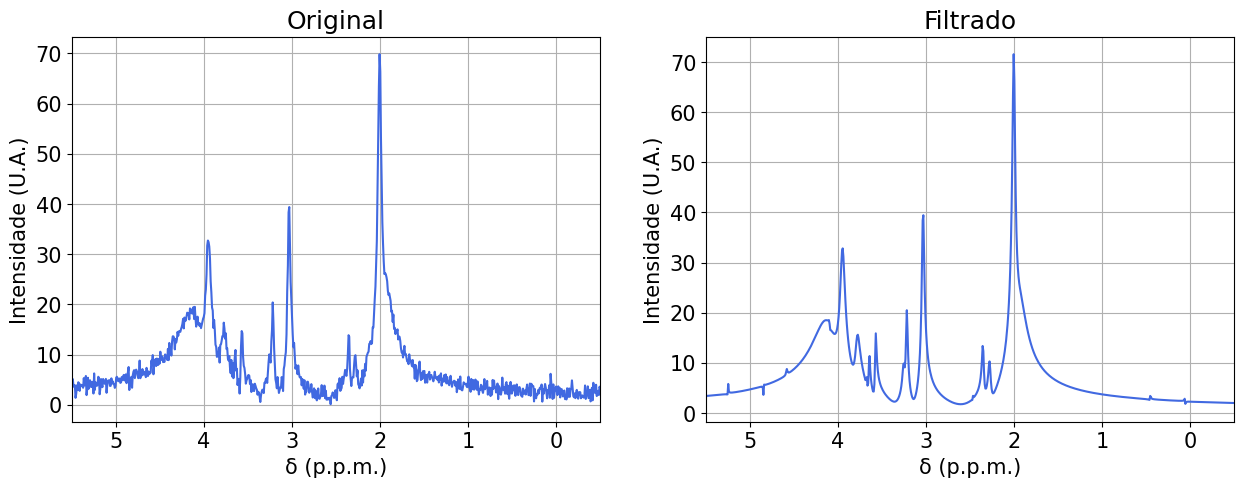

In [47]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(c_plot_freqs[:b], np.absolute(c_plot_sig_fft[:b]), c = "royalblue")
plt.xlim(-0.5, 5.5)
plt.title("Original")
plt.xlabel("δ (p.p.m.)")
plt.ylabel("Intensidade (U.A.)")
plt.gca().invert_xaxis() #inverts the x axis
plt.grid()

plt.subplot(122)
plt.plot(r_c_plot_freqs[:b], np.absolute(r_c_plot_sig_fft[:b]), c = "royalblue")
plt.xlim(-0.5, 5.5)
plt.title("Filtrado")
plt.xlabel("δ (p.p.m.)")
plt.ylabel("Intensidade (U.A.)")
plt.gca().invert_xaxis() #inverts the x axis
plt.grid()